In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Correlation EDA

In [4]:
# 选择大于0.5的中度相关feature
# clean data
train = pd.read_csv('./data.csv') # 训练集的读取
train1 = train
train1=train1.fillna(train1.median())
train1=train1.fillna('None') 
top_corr_feature = train1.corr()['SalePrice']
top_corr_feature = top_corr_feature[abs(top_corr_feature)>0.5]
print(top_corr_feature)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


> **可以看到一共有10个feature > 0.5, 这里也应该考略中度负相关, 但实际上没有小于-0.5的feature，因此忽略不计**
> GarageArea 和 GarageCars 因为高度相关，只取一个
>'TotalBsmtSF'和 '1stFlrSF'一个是地下室面积，一个是一层面积，选其中一个就可以

>故筛选完，剩下8个变量

>Feature | Description
>--- | ---
>OverallQual | 装修评估
>YearBuilt | 建造年份
>YearRemodAdd | 重装年份
>TotalBsmtSF | 地下室总面积
>GrLivArea | 生活面积
>FullBath | 能洗澡的卫生间个数
>TotRmsAbvGrd | 总房间数（不包括浴室）
>GarageCars | 车库可容纳的车辆数


## 提取主要特征

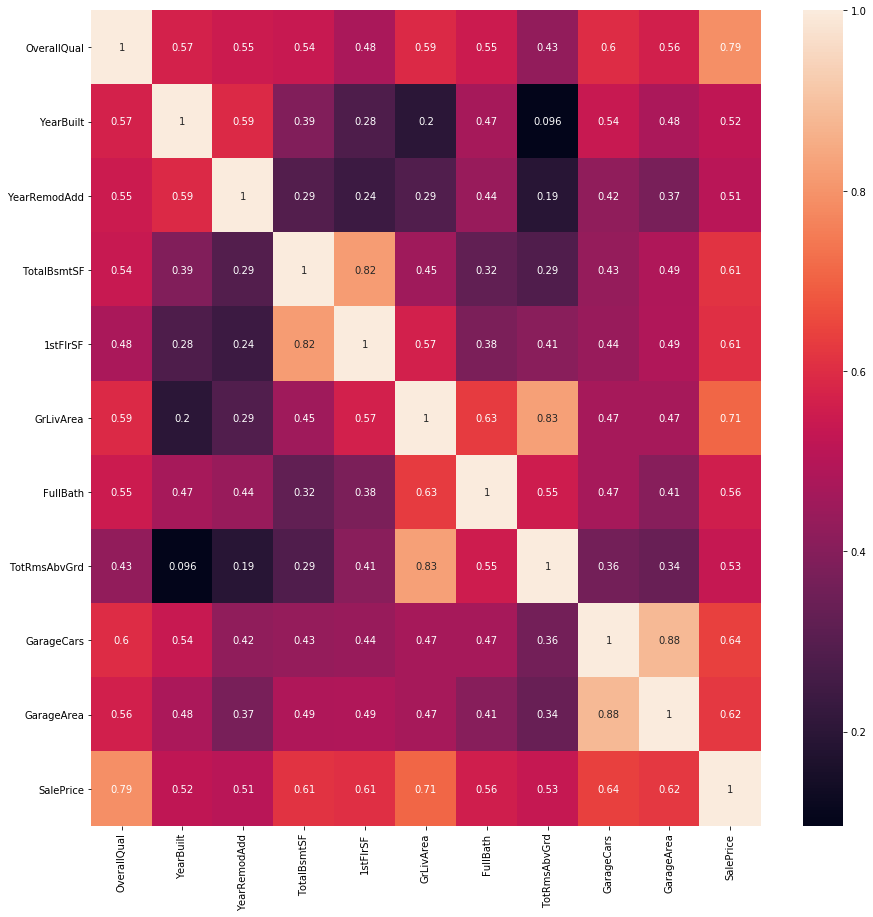

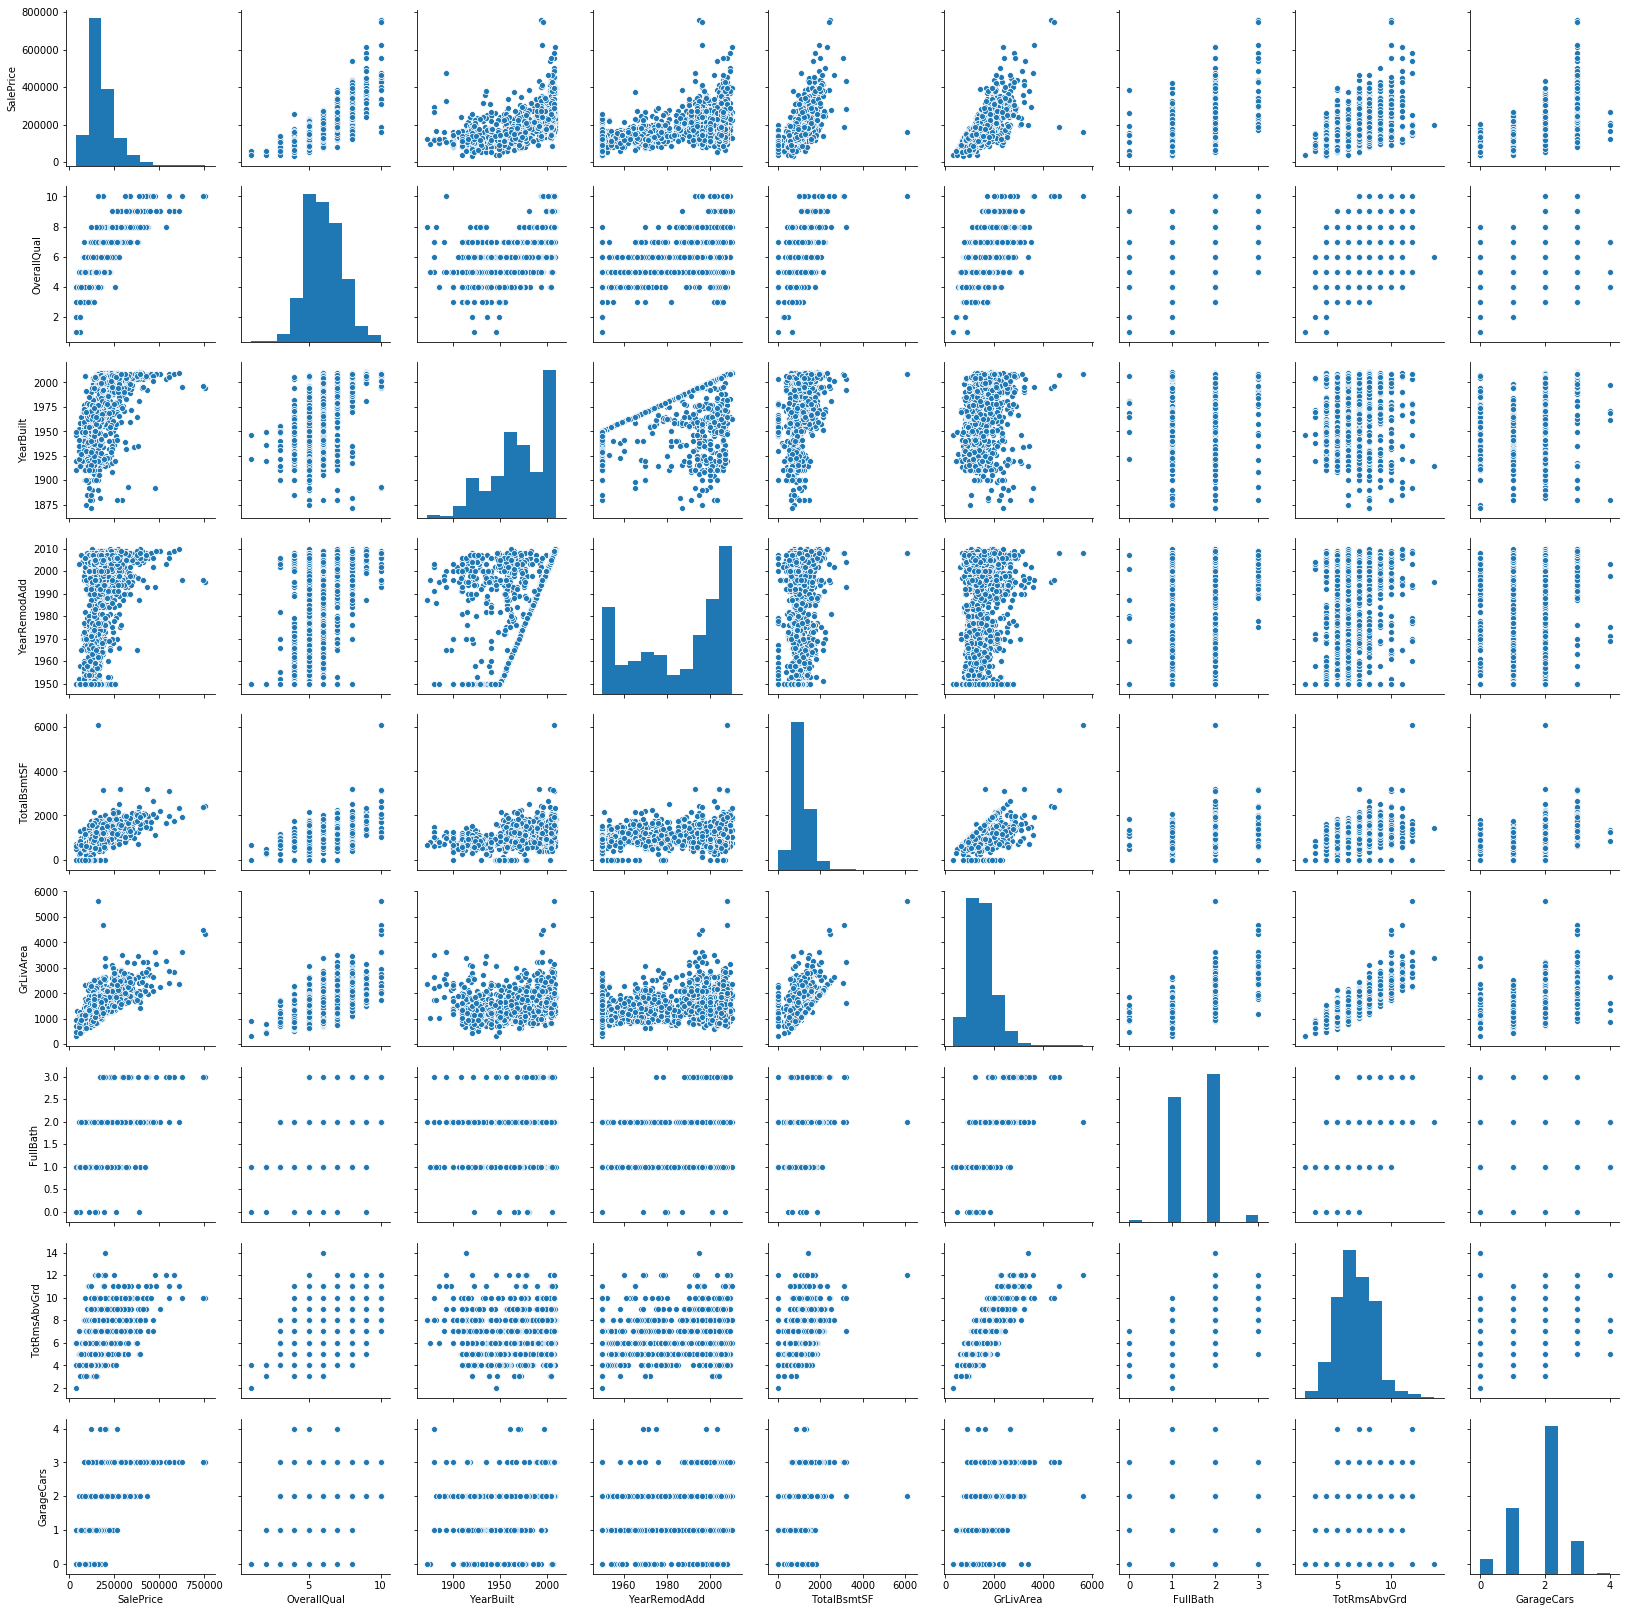

In [14]:
top_corr_matrix = train1[top_corr_feature.index].corr()
fig, axs = plt.subplots(1, figsize=(15,15))
# heatmap plot1
sns.heatmap(top_corr_matrix, vmax=1, annot=True, ax=axs)
# scatter plot2
features = ['SalePrice','OverallQual','YearBuilt', 
        'YearRemodAdd','TotalBsmtSF', 'GrLivArea', 
        'FullBath', 'TotRmsAbvGrd', 'GarageCars']
sns.pairplot(train1[features], height = 2.5)

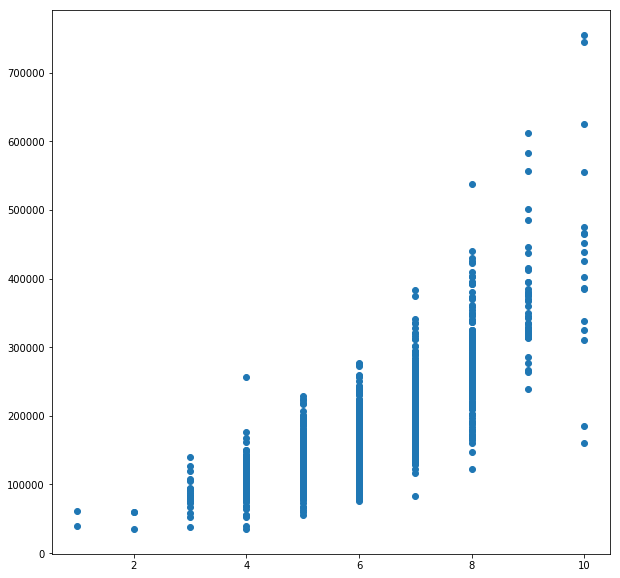

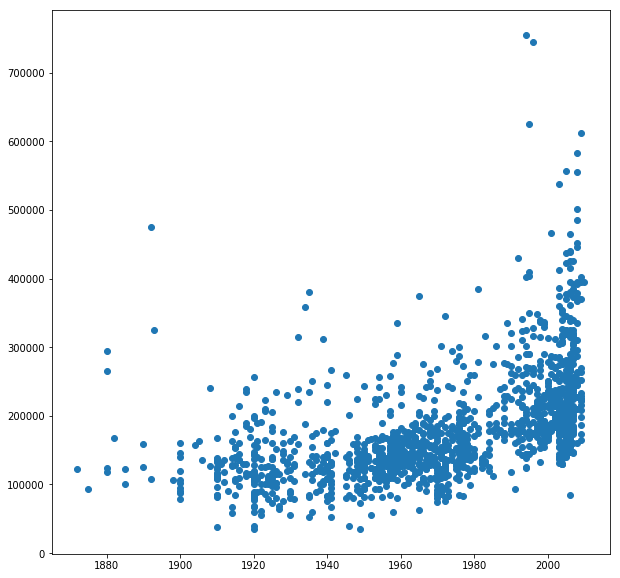

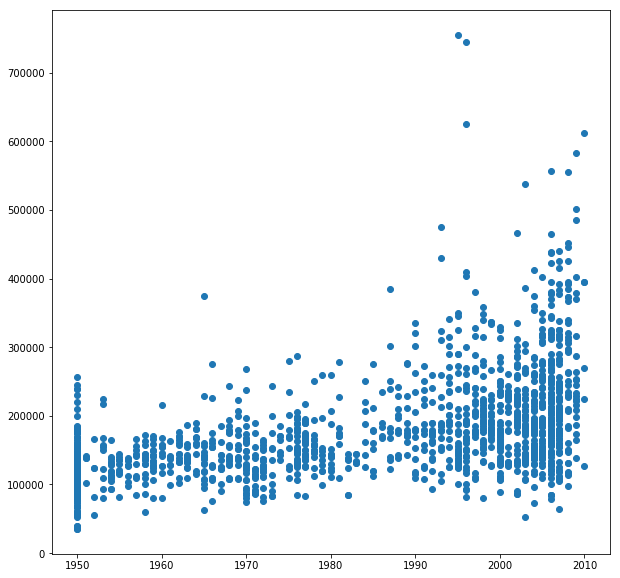

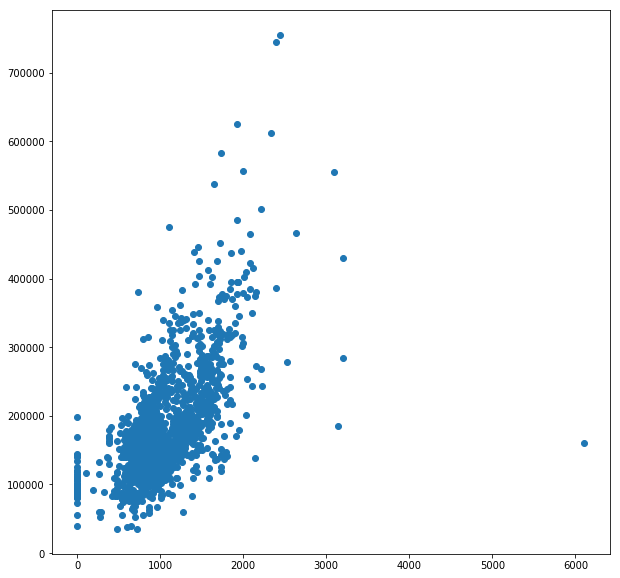

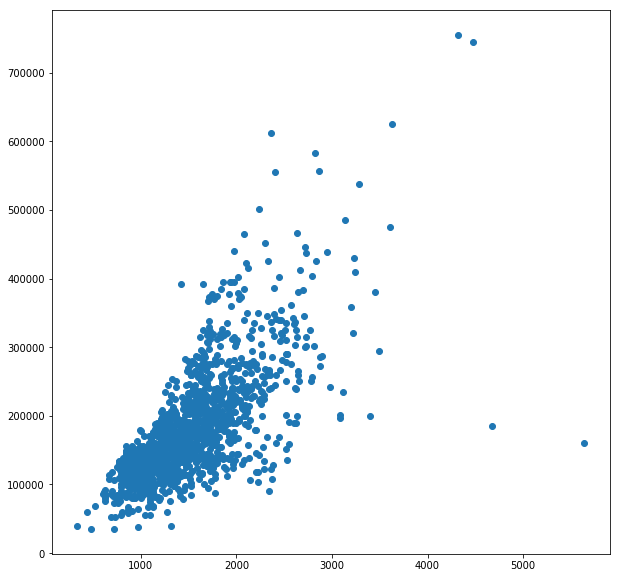

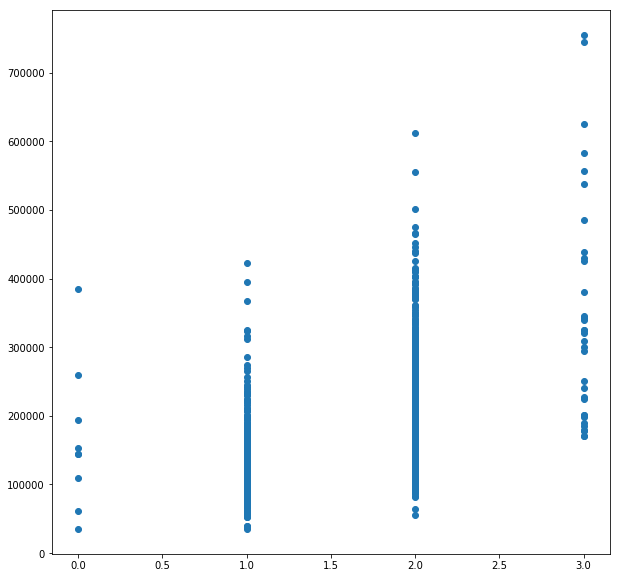

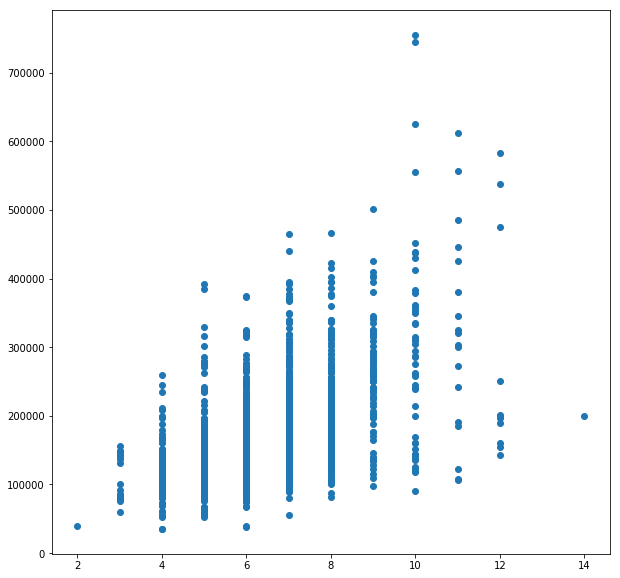

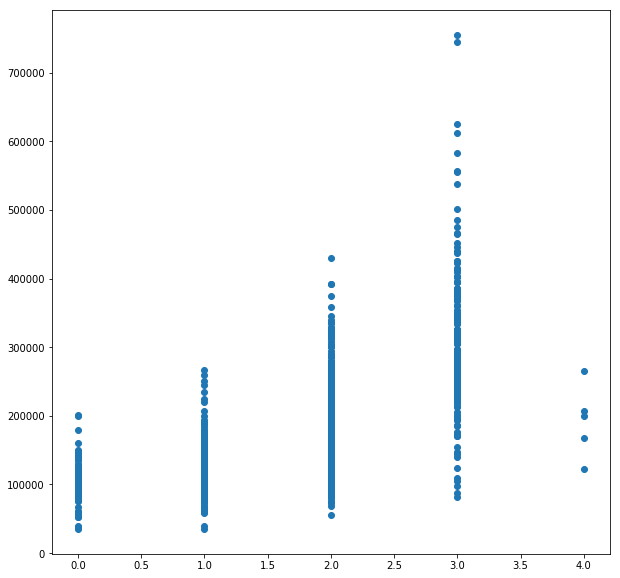

In [31]:
for feature in features[1:]:
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.scatter(train1[feature], train1['SalePrice'])

## Boxplot

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageCars


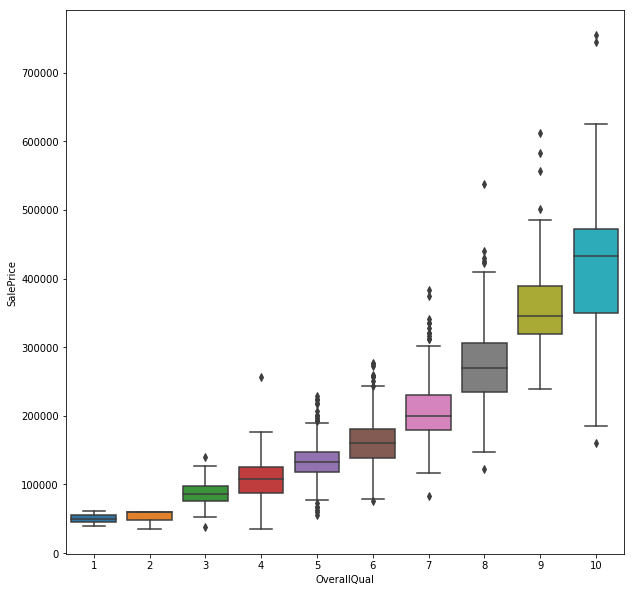

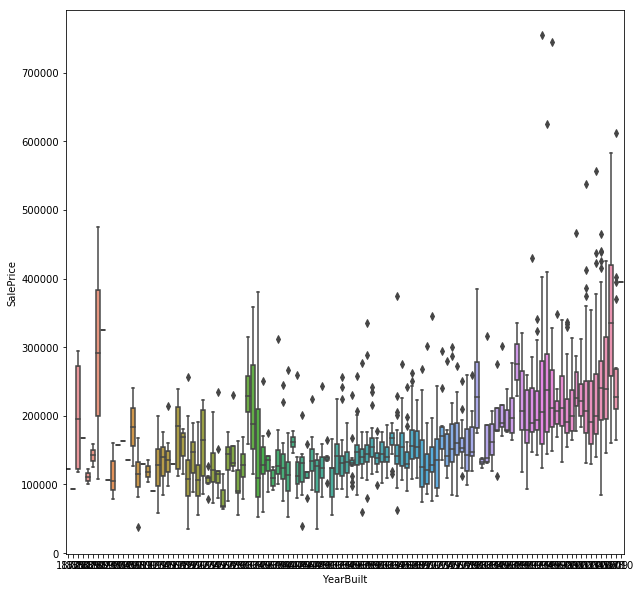

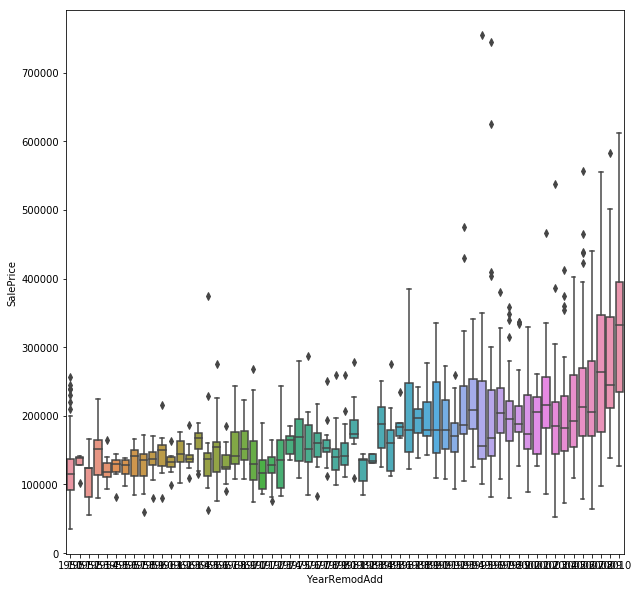

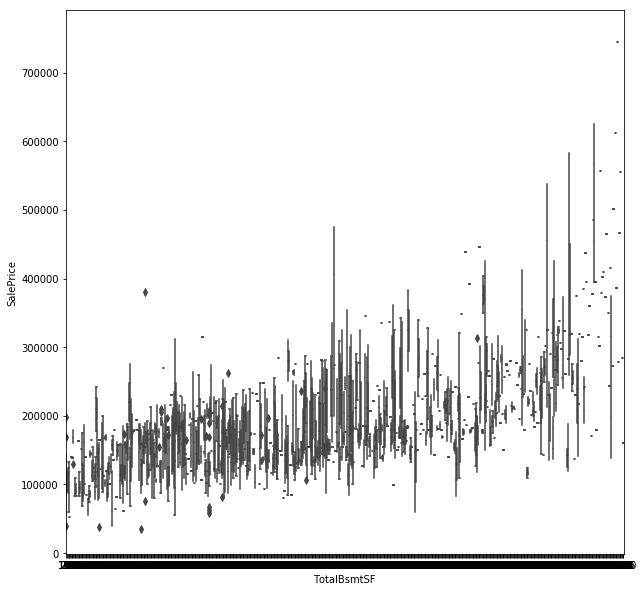

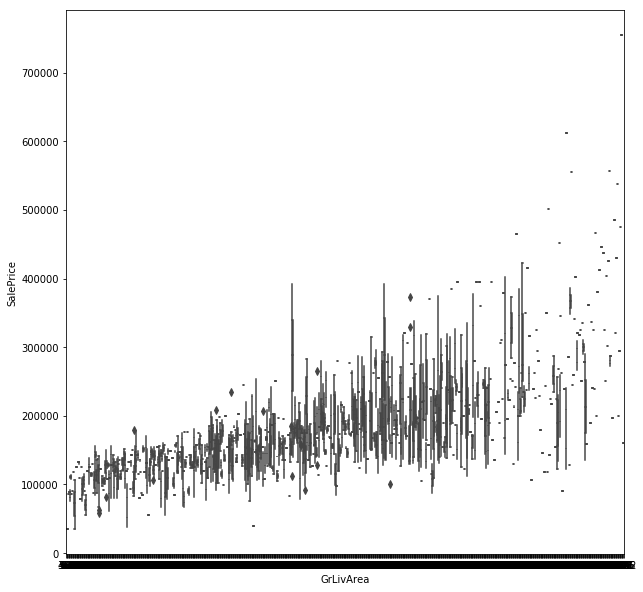

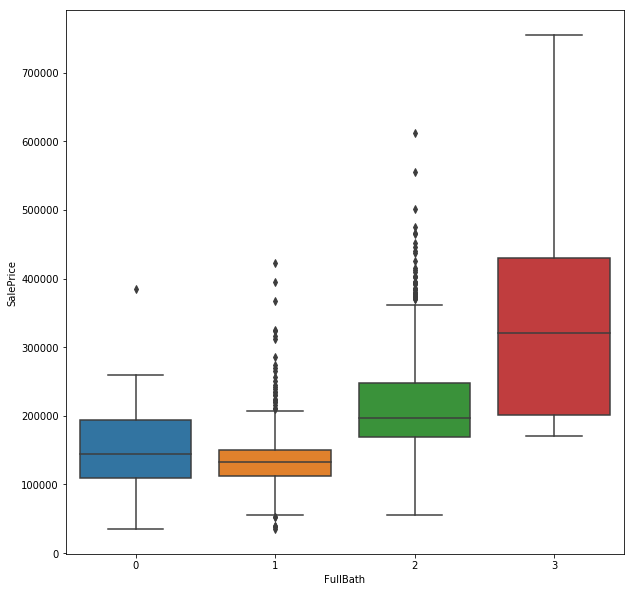

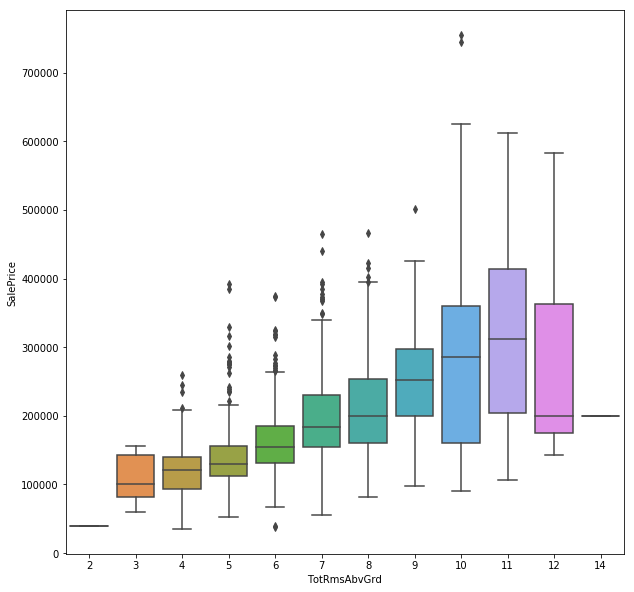

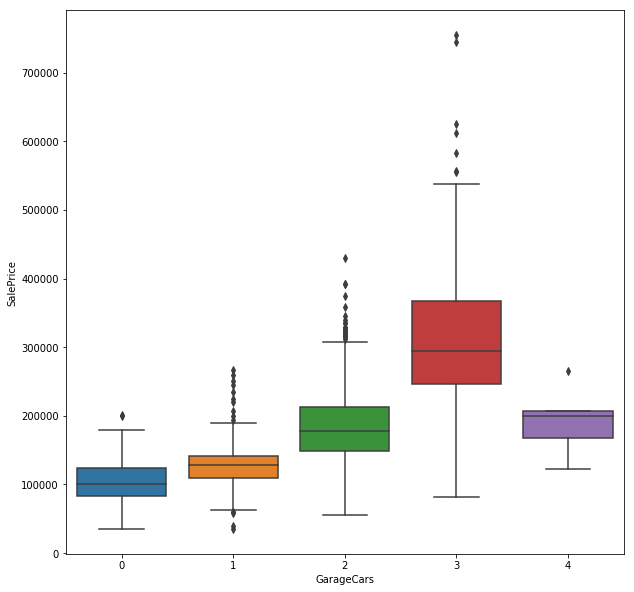

In [17]:
for feature in features[1:]:
    var = feature
    print(feature)
    data = pd.concat([train1['SalePrice'], train1[var]], axis=1)
    fig, ax = plt.subplots(1, figsize=(10,10))
    sns.boxplot(x=var, y="SalePrice", data=data, ax = ax)